In [29]:
import json
import time
import threading

from datetime import datetime
from twython import Twython

from twitter_key import t_key, t_secret

In [30]:
# Assigns the keys to the variables
APP_KEY = t_key
APP_SECRET = t_secret

# Setup a Lat Lon
latlong = [42.3598, -71.0921]

''' Fetches tweets with a given query at a given lat-long.'''
def get_tweets( latlong=None ):
    # Creates a Twithon object with the given keys
    twitter = Twython( APP_KEY, APP_SECRET )
    # Uses the search function to hit the APIs endpoints and look for recent tweets within the area
    results = twitter.search( geocode=','.join([ str(x) for x in latlong ]) + ',10km', result_type='recent', count=10000)
    # Returns the only the statuses from the resulting JSON
    return results['statuses']
print get_tweets( latlong )

[{u'contributors': None, u'truncated': False, u'text': u'New shoes are tight #adidas #ultraboost @ Boston, Massachusetts https://t.co/Psud1velZx', u'is_quote_status': False, u'in_reply_to_status_id': None, u'id': 705174441286770688L, u'favorite_count': 0, u'source': u'<a href="http://instagram.com" rel="nofollow">Instagram</a>', u'retweeted': False, u'coordinates': {u'type': u'Point', u'coordinates': [-71.0617, 42.3578]}, u'entities': {u'symbols': [], u'user_mentions': [], u'hashtags': [{u'indices': [20, 27], u'text': u'adidas'}, {u'indices': [28, 39], u'text': u'ultraboost'}], u'urls': [{u'url': u'https://t.co/Psud1velZx', u'indices': [64, 87], u'expanded_url': u'https://www.instagram.com/p/BCeCEIrvsDh/', u'display_url': u'instagram.com/p/BCeCEIrvsDh/'}]}, u'in_reply_to_screen_name': None, u'in_reply_to_user_id': None, u'retweet_count': 0, u'id_str': u'705174441286770688', u'favorited': False, u'user': {u'follow_request_sent': None, u'has_extended_profile': True, u'profile_use_backgro

In [31]:
""" Does pretty much what its long name suggests. """
def get_lots_of_tweets( latlong ):
    # Create a dictionary to parse the JSON
    all_tweets = {}
    
    # We will be hitting the API a number of times within the total time
    total_time = 15*60
    # Everytime we hit the API we subtract time from the total
    remaining_seconds = total_time
    interval = 30 
    while remaining_seconds > 0:
        added = 0
        # We hit the Twitter API
        new_tweets = get_tweets( latlong )
        # We parse the resulting JSON, and save the rest of the raw content
        for tweet in new_tweets:
            tid = tweet['id']
            if tid not in all_tweets and tweet['coordinates'] != None:
                properties = {}
                properties['lat'] = tweet['coordinates']['coordinates'][1]
                properties['lon'] = tweet['coordinates']['coordinates'][0]
                properties['tweet_id'] = tid
                properties['content'] = tweet['text']
                properties['user'] = tweet['user']['id']
                properties['user_location'] = tweet['user']['location']
                properties['raw_source'] = tweet
                properties['data_point'] = 'none'
                properties['time'] = tweet['created_at']
                all_tweets[ tid ] = properties
                added += 1
        print "At %d seconds, added %d new tweets, for a total of %d" % ( total_time - remaining_seconds, added, len( all_tweets ) )
        # We wait a few seconds and hit the API again
        time.sleep(interval)
        remaining_seconds -= interval
    # We return the final dictionary
    return all_tweets
print get_lots_of_tweets( latlong )

At 0 seconds, added 93 new tweets, for a total of 93
At 30 seconds, added 1 new tweets, for a total of 94
At 60 seconds, added 1 new tweets, for a total of 95
At 90 seconds, added 2 new tweets, for a total of 97
At 120 seconds, added 1 new tweets, for a total of 98
At 150 seconds, added 0 new tweets, for a total of 98
At 180 seconds, added 3 new tweets, for a total of 101
At 210 seconds, added 2 new tweets, for a total of 103
At 240 seconds, added 3 new tweets, for a total of 106
At 270 seconds, added 1 new tweets, for a total of 107
At 300 seconds, added 1 new tweets, for a total of 108
At 330 seconds, added 1 new tweets, for a total of 109
At 360 seconds, added 1 new tweets, for a total of 110
At 390 seconds, added 0 new tweets, for a total of 110
At 420 seconds, added 0 new tweets, for a total of 110
At 450 seconds, added 1 new tweets, for a total of 111
At 480 seconds, added 1 new tweets, for a total of 112
At 510 seconds, added 1 new tweets, for a total of 113
At 540 seconds, adde

In [32]:
'''This function executes the rest of the functions over a given period of time'''
def run():
    # This is the number of times the code will be executed. In this case, just once. 
    starting = 1
    while starting > 0:
        # Sometimes the API returns some errors, killing the whole script, so we setup try/except to make sure it keeps running
        try:
            # We define a centroid in Riyadh
            latlong = [42.3598, -71.0921]
            t = get_lots_of_tweets( latlong )
            # We name every file with the current time
            timestr = time.strftime("%Y%m%d-%H%M%S")
            # We write a new JSON into the target path
            with open( 'data/%stweets.json' %(timestr), 'w' ) as f:
                f.write( json.dumps(t))
            # we can use a library like threading to execute the run function continuously.
            #threading.Timer(10, run).start()
            starting -= 1
        except:
            pass
    
run()

At 0 seconds, added 84 new tweets, for a total of 84
At 30 seconds, added 1 new tweets, for a total of 85
At 60 seconds, added 0 new tweets, for a total of 85
At 90 seconds, added 5 new tweets, for a total of 90
At 120 seconds, added 1 new tweets, for a total of 91
At 150 seconds, added 0 new tweets, for a total of 91
At 180 seconds, added 2 new tweets, for a total of 93
At 210 seconds, added 6 new tweets, for a total of 99
At 240 seconds, added 0 new tweets, for a total of 99
At 270 seconds, added 2 new tweets, for a total of 101
At 300 seconds, added 0 new tweets, for a total of 101
At 330 seconds, added 3 new tweets, for a total of 104
At 360 seconds, added 1 new tweets, for a total of 105
At 390 seconds, added 1 new tweets, for a total of 106
At 420 seconds, added 1 new tweets, for a total of 107
At 450 seconds, added 0 new tweets, for a total of 107
At 480 seconds, added 1 new tweets, for a total of 108
At 510 seconds, added 1 new tweets, for a total of 109
At 540 seconds, added 0

In [33]:
# Import additional libraries
from os import listdir
from os.path import isfile, join
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Get the file names from a given directory
file_dir = 'data' # Set this to where your JSON saved
onlyfiles = [ f for f in listdir(file_dir) if isfile(join(file_dir,f)) and not f.startswith('.')]

# Initialize some lists to store the points, and the ids of the tweets
ids = []
all_pts = []
# Loop through all the files
for file in onlyfiles:
    full_dir = join(file_dir,file)
    # Open the JSON
    with open(full_dir) as f:
        data = f.read()
        # Load the JSON as a dict
        dict = json.loads(data)
        # Only add the unique tweets to the list
        if not isinstance(dict, list):
            for key, val in dict.iteritems():
                if key not in ids:
                    ids.append(key)
                    lat = val['lat']
                    lon = val['lon']
                    tweet_id2 = val['tweet_id']
                    all_pts.append([lat,lon,tweet_id2])
pts = np.array(all_pts)
pts             

array([[  4.23726399e+01,  -7.11096528e+01,   7.05184585e+17],
       [  4.23664890e+01,  -7.10545200e+01,   7.05180755e+17],
       [  4.23584308e+01,  -7.10597732e+01,   7.05177388e+17],
       [  4.23824883e+01,  -7.11199570e+01,   7.05191265e+17],
       [  4.23550230e+01,  -7.11342850e+01,   7.05178888e+17],
       [  4.23507921e+01,  -7.10773843e+01,   7.05175536e+17],
       [  4.23500000e+01,  -7.10760000e+01,   7.05188195e+17],
       [  4.23661929e+01,  -7.10619144e+01,   7.05187924e+17],
       [  4.23632864e+01,  -7.11020121e+01,   7.05177233e+17],
       [  4.23966830e+01,  -7.11228244e+01,   7.05191083e+17],
       [  4.23492885e+01,  -7.11036472e+01,   7.05193941e+17],
       [  4.23492012e+01,  -7.10693436e+01,   7.05187070e+17],
       [  4.23584308e+01,  -7.10597732e+01,   7.05189456e+17],
       [  4.23578000e+01,  -7.10617000e+01,   7.05175497e+17],
       [  4.23661900e+01,  -7.10623500e+01,   7.05186118e+17],
       [  4.23726399e+01,  -7.11096528e+01,   7.0519098

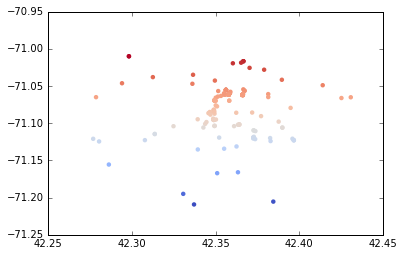

In [34]:
# Use a scatter plot to make a quick visualization of the data points
#plt.scatter(pts[:,0], pts[:,1])
x=pts[:,0]
y=pts[:,1]
a=y
plt.scatter(x, y, c=a, cmap=plt.cm.coolwarm, linewidths=0)

In [35]:
import csv

with open("mit_tweets.csv", "wb") as f:
    writer = csv.writer(f)
    writer.writerows(pts)